# Computer Science 2XC3 - Graded Lab II

Please refer to the pdf for detailed instructions. The below file contains all the preliminary code you will need to work on the lab. You can copy paste instructions here to create one cohesive lab and organize it that best suits your teams workflow. 

In [1]:
import random
import timeit 
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
class GraphI:

    # using hash map
    def __init__(self, edges):
        self.graph = {}
        for x,y in edges:
            if x not in self.graph.keys():
                self.graph[x]=[]
            self.graph[x].append(y)

    def has_edge(self, src, dst):
        return src in self.graph[dst]

    def get_graph_size(self,):
        return len(self.graph)
    
    def get_graph(self,):
        return self.graph

In [3]:
class GraphII:

    # using adjacency list
    def __init__(self, nodes):
        self.graph = []
        # node numbered 0-1
        for node in range(nodes):
            self.graph.append([])
        
    def has_edge(self, src, dst):
        return src in self.graph[dst]
    
    def add_edge(self,src,dst):
        if not self.has_edge(src,dst):
            self.graph[src].append(dst)
            self.graph[dst].append(src)
    
    def get_graph(self,):
        return self.graph

In [19]:
class GraphIII:

    def __init__(self, edges):
        self.graph = {}
        for x, y in edges:
            self.add_edge(x, y)

    def add_edge(self, src, dst):
        if src not in self.graph:
            self.graph[src] = []
        if dst not in self.graph:
            self.graph[dst] = []
        if dst not in self.graph[src]:
            self.graph[src].append(dst)
        if src not in self.graph[dst]:
            self.graph[dst].append(src)

    def remove_edge(self, src, dst):
        if src in self.graph and dst in self.graph[src]:
            self.graph[src].remove(dst)
        if dst in self.graph and src in self.graph[dst]:
            self.graph[dst].remove(src)

    def get_vertices(self):
        return list(self.graph.keys())

    def get_neighbors(self, vertex):
        return self.graph.get(vertex, [])

    def get_edges(self):
        edges = []
        for vertex, neighbors in self.graph.items():
            for neighbor in neighbors:
                if (vertex, neighbor) not in edges and (neighbor, vertex) not in edges:
                    edges.append((vertex, neighbor))
        return edges

    # Check if an edge exists between two vertices
    def has_edge(self, src, dst):
        return dst in self.graph.get(src, [])


In [43]:
def depth_first_search(G,node,end_point=None):
    stack = [node]
    graph = G.get_graph()
    seen=set()

    while len(stack) !=0:
        node = stack.pop()
        # search for neighbours in graph
        if node not in seen:
            seen.add(node)
            print("Visited node:" + str(node))
            # if the given node has an edge
            if node in graph.keys():
                # iterate over edges of node
                for nn in graph[node]:

                    # limited traversal
                    if nn == end_point:
                        return True
                    # add to stack
                    stack.append(nn)

In [6]:
#Breadth First Search
def breadth_first_search(G, node):
    stack = [node]
    graph = G.get_graph()
    seen=set()

    seen.add(node)

    while len(stack) > 0:
        node = stack[0]
        stack = stack[1:]
        print("Visiting node: " + str(node))
        if node in graph.keys():
            for nn in graph[node]:
                #if node == node2:
                #    return True
                if nn not in seen:
                    stack.append(nn)
                    seen.add(nn)

In [7]:
#Use the methods below to determine minimum vertex covers

def add_to_each(sets, element):
    copy = sets.copy()
    for set in copy:
        set.append(element)
    return copy

def power_set(set):
    if set == []:
        return [[]]
    return power_set(set[1:]) + add_to_each(power_set(set[1:]), set[0])

def is_vertex_cover(G, C):
    for start in G.adj:
        for end in G.adj[start]:
            if not(start in C or end in C):
                return False
    return True

def MVC(G):
    nodes = [i for i in range(G.get_size())]
    subsets = power_set(nodes)
    min_cover = nodes
    for subset in subsets:
        if is_vertex_cover(G, subset):
            if len(subset) < len(min_cover):
                min_cover = subset
    return min_cover


In [17]:
#New implementation according to GraphIII, for Part 2

def add_to_each(sets, element):
    copy = sets.copy()
    for subset in copy:
        subset.append(element)
    return copy

def power_set(input_set):
    if not input_set:
        return [[]]
    rest_power_set = power_set(input_set[1:])
    return rest_power_set + add_to_each(rest_power_set, input_set[0])

def is_vertex_cover(graph, cover):
    for start in graph.get_vertices():
        for end in graph.get_neighbors(start):
            if not(start in cover or end in cover):
                return False
    return True

def MVC(graph):
    nodes = graph.get_vertices()
    subsets = power_set(nodes)
    min_cover = nodes
    for subset in subsets:
        if is_vertex_cover(graph, subset):
            if len(subset) < len(min_cover):
                min_cover = subset
    return min_cover

### Part 1

In class, we discussed a simple implementation of the undirected and non-weighted version of the graph.
We also talked about the directed graph implementation where both the path between “src” and “dst”
nodes is stored. We will also discuss how to search if a node exists in a graph using Breadth First Search
(BFS) and Depth First Search (DFS). Using these techniques, the functions we discussed return True if
the path exists between 2 nodes, otherwise it returns false.

#
This implementation is limiting since not much can be accomplished with True and False. In this lab,
implement two variations of BFS and DFS

### Part 1.1


Implement BFS2 and DFS2 where the path between two nodes node1 and node2 is returned as a
list. For instance, in a graph, if to reach node 8 from node 6, one needs to traverse the path starting at 6 to
23, to 12, then to 5, then to 10, and finally to 8, your function BFS2(graph, 6,8) (or DFS2(graph, 6,8))
should return a list [6,23,12,5,10,8]. Implement both BFS2 and DFS2 for this variation.


### Part 1.2
In some applications, we need to find connections from a given node to all nodes. Think about
how one might find recommendations for possible connections on social media platforms. In this
variation implement BFS3 and DFS3 which take as an input 1 node and return paths to every other node
(note that this is different from all paths between all nodes. Your goal is to find a path to a node). These
paths should be returned as a “predecessor dictionary”. Predecessor dictionary contains the key as the
node and the value as the predecessor node. For example, for the following graph, your implementation of
BFS3(graph, 1) will return the predecessor dictionary as: {2 : 1, 3 : 1, 4 : 2, 5 : 3, 6 : 4}
Now it is possible to reconstruct the path from this dictionary by simply connecting the predecessors of
each node backward. So the path from 1 to 6 is 1 -> 2 -> 4 -> 6. If there is no path between 2 nodes there
will be no entry in the dictionary corresponding to that.



### Part 1.3
 Implement a function in the graph class called has_cycle( ) that computes and returns True if
the graph has a cycle.


### Part 1.4
Implement a function in graph class called is_connected( ) that computes and returns True if
there is a path between two nodes. Note that this is different from what we discussed in class ( has_edge()
). While has_edge finds whether an edge exists between two nodes, is_connected finds whether there is a
path between two nodes.


### Part 1.5
In the previous lab we conducted a few experiments using a random list generator that I
provided. What would that look like for a graph? To experiment with graphs, you want to be able to
generate random graphs. Write a function to do so. The way to approach this is to think about the
essential elements of the graph nodes (n) and edges (e). So when you call the function
create_random_graph(n,e), it should create a random layout with only a single edge between two nodes

### Part 1.6
 By now, you should have a good understanding of how to design an experiment to answer a
question. In this part, design an experiment to compute the probability of a graph having a cycle, when
you generate a random graph with n nodes and e edges. This is an open-ended question so think about
how you would design the experiment.
HINT: Create a sufficiently large number of graphs using a fixed number of nodes (or edges??). compute
for each graph, whether or not it has a cycle (you have already written this function in the previous
section). Then calculate what proportion of the random graphs had cycles.
As usual, there are multiple ways you can approach this problem, so be creative. In your reflection,
describe your experiment design, the number of iterations you ran, why you chose a specific experiment
design etc. You can run this experiment multiple times and your graph should show the probability
computed in each iteration.

### Part 1.7
Similar to Part 1.6 design an experiment to compute the probability of a graph being connected
when you generate a random graph with n nodes and e edges. Again, you can use a similar strategy and
describe in your reflection, your experiment design, and number of experiments and justify your choices.

### Part 2
Computing minimum vertex cover is a basic combinatorial optimization problem where the goal is to
determine a minimum subset of vertices that cover all edges. The jupyter notebook contains a function to
compute the minimum vertex cover for an undirected graph. It works for graphs for small node sizes
(<30). Implement 3 different approximation algorithms for the Vertex Cover Problem.


### Part 2.1
Approx1 (graph) takes in an object of Graph and does the following:
1. Start with an empty set C = {}
2. Find the vertex with the highest degree in G, call this vertex v.
3. Add v to C
4. Remove all edges incident to node v from G
5. If C is a Vertex Cover return C, else go to Step 2

In [5]:
def Approx1(graph):
    C = set() #Step 1

    while True:
        max_degree = -1
        max_vertex = None
        for vertex in graph.get_vertices(): #Step 2
            degree = len(graph.get_neighbors(vertex))
            if degree > max_degree:
                max_degree = degree
                max_vertex = vertex

        if max_vertex is None:
            break

        #Step 3
        C.add(max_vertex)
        #Step 4
        graph.remove_vertex(max_vertex)

        if not graph.get_edges():
            break
    #Step 5
    return C


In [6]:
# Example graph edges
edges = [
    (1, 2), (1, 3),
    (2, 3), (2, 4),
    (3, 4), (3, 5),
    (4, 5), (4, 6),
    (5, 6)
]

# Create a GraphIII instance
graph = GraphIII(edges)

# Apply the Approx1 algorithm to find an approximate minimum vertex cover
vertex_cover_approx = Approx1(graph)

# Print the resulting vertex cover
print("Approximate Vertex Cover found by Approx1:", vertex_cover_approx)


Approximate Vertex Cover found by Approx1: {1, 3, 4, 5}


### Part 2.2
Approx2(graph) takes as an input, an object of Graph and does the following:
1. Start with an empty set C = {}
2. Select a vertex randomly from G which is not already in C, call this vertex v
3. Add v to C
4. If C is a Vertex Cover return C, else go to Step 2


In [10]:
import random

def Approx2(graph):
    C = set()  #Step 1
    all_vertices = set(graph.get_vertices())  

    while True:

        uncovered_edges = [edge for edge in graph.get_edges() if not (edge[0] in C or edge[1] in C)]

        if not uncovered_edges:
            break

        potential_vertices = all_vertices - C
        if not potential_vertices:
            break
        #St
        v = random.choice(list(potential_vertices))

        #Step 3
        C.add(v)
    #step
    return C


In [11]:
# Use the same graph as before
graph = GraphIII(edges)

# Apply the Approx2 algorithm
vertex_cover_approx2 = Approx2(graph)

# Print the resulting vertex cover
print("Approximate Vertex Cover found by Approx2:", vertex_cover_approx2)

Approximate Vertex Cover found by Approx2: {1, 2, 3, 4, 5}


### Part 2.3
Approx3(graph) takes as an input, an object of Graph and does the following:
1. Start with an empty set C = {}
2. Select an edge randomly from G, call this edge (u,v)
3. Add u and v to C
4. Remove all edges incident to u or v from G
5. If C is a Vertex Cover return C, else go to Step 2

Note: When you remove (or perform any other operation on) an edge, do not directly manipulate the
graph, instead work on a local copy of the input graph.

In [20]:
import random
import copy

def Approx3(graph):
    C = set()  # Initialize the vertex cover set C as an empty set
    local_graph = copy.deepcopy(graph)  # Work on a local copy of the graph

    while True:
        edges = local_graph.get_edges()
        # If there are no edges left, we have found a vertex cover
        if not edges:
            break

        # Step 2: Select an edge randomly from the graph
        u, v = random.choice(edges)

        # Step 3: Add both vertices of the chosen edge to C
        C.add(u)
        C.add(v)

        # Step 4: Remove all edges incident to u or v from the local copy of G
        for neighbor in list(local_graph.get_neighbors(u)):
            local_graph.remove_edge(u, neighbor)
            local_graph.remove_edge(neighbor, u)
        
        # Remove v and its edges
        for neighbor in list(local_graph.get_neighbors(v)):
            local_graph.remove_edge(v, neighbor)
            local_graph.remove_edge(neighbor, v)

    return C


### Part 2.4
Evaluate whether (or not) the above algorithms return the minimum vertex covers. In case they
do not compute how far off the minimum is? For a given random graph with n nodes and e edges, what
proportion of the minimum vertex cover is expected from approx1, approx2, approx3?
One important thing that you would need is what is the “actual” minimum vertex cover against which you
are comparing, what is the baseline. Be creative here.
HINT: A potential experiment can be:
1. Generate 100 random graphs with 6 nodes and e edges where e = {1,5,10,15,20}
2. Find the minimum Vertex Cover (MVC) for each graph, and sum the size of all these MVCs (this can be a potential baseline).
3.  Run each of your approximations on each of the same 100 graphs (do not modify the graphs within your experiment). Keep track of the sum of the sizes of each approximation’s Vertex Covers
4. Then you can measure an approximation’s expected performance by looking at that approximation’s size sum over the sum of all MVCs
5. Graph each of the approximation’s “expected performance” as it relates to the number of edges on the graph.
#
In total, you should have at least three meaningful graphs in this section. This does not mean 1 graph for
each approximation! You should be able to plot each of the approximation’s curves on a single graph.
Some questions to consider in your experiment:
#
1. Is there a relationship between how good we would expect an approximation to be and the number of edges in a graph? In general, does the approximation get better/worse as the number of edges increases/decreases?
2. Is there a relationship between how good we would expect an approximation to be and the number of nodes in a graph? In general, does the approximation get better/worse as the number of nodes increases/decreases?
3. The approach described in the Potential Experiment is getting at the average performance of the approximation. What about the worst case of the approximation? To figure that out we would have to test our approximations on every single graph for approx1(). And for the other two the non-deterministic nature of the algorithms makes this even more problematic. However, we may be able to test the worst case for approx1() on very small graphs. How would you generate all graphs of size 5 for example?
Discuss these in your reflection section.


### Part 2.5
Another graph problem is the Independent Set problem. Given a graph G = (V, E) we say S is
an Independent Set in G if and only if:
#
𝑆 ⊆ 𝑉 and ∀𝑢, 𝑣 ∈ 𝑆, (𝑢, 𝑣) ∉ 𝐸
#
Or S is an Independent Set if there are no edges in G connecting the nodes in S. In general, it is easy to
find an Independent Set of G. For example, {} is trivially an Independent Set. It is much harder to find the
largest Independent Set in a graph G.
#
Implement a function MIS(G), which returns a maximum Independent Set in G. Hint, brute force this
similar to how we brute forced the MVC problem. But you can use some logic if you want are brave.

In [31]:
def is_independent_set(graph, subset):
    for u in subset:
        # Check neighbors of u to ensure none are in the subset
        for v in graph.get_neighbors(u):
            if u != v and v in subset:
                return False
    return True


def power_set(s):
    """Generate the power set of s."""
    result = [[]]
    for elem in s:
        result.extend([x + [elem] for x in result])
    return result

def MIS(graph):
    """Find the Maximum Independent Set (MIS) in the graph."""
    vertices = graph.get_vertices()
    all_subsets = power_set(vertices)
    max_set = []

    for subset in all_subsets:
        if is_independent_set(graph, subset) and len(subset) > len(max_set):
            max_set = subset

    return max_set


### Part 2.6

Experiment with some random graphs and MIS and MVC. Is there a relationship between the minimum Vertex Cover and the Maximum Independent Set?

#
Hint: yes. Determine what this relationship is. To get started, generate some random graphs with n nodes. When you sum the size of the MIS and the size of the MVC, what do you observe?

Average sum of MVC and MIS sizes: 9.98


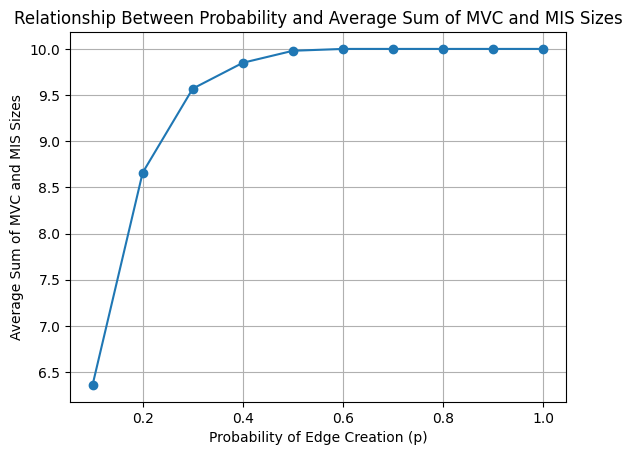

In [39]:
import matplotlib.pyplot as plt

# Function to generate random graph with n nodes and probability p for each edge
def generate_random_graph(n, p):
    edges = []
    for i in range(n):
        for j in range(i + 1, n):
            if random.random() < p:
                edges.append((i, j))
    return edges


# Function to perform the experiment
def experiment(num_graphs, n, p):
    total_sum = 0
    for _ in range(num_graphs):
        edges = generate_random_graph(n, p)
        graph = GraphIII(edges)
        mvc_size = len(MVC(graph))  # Get the size of the MVC
        mis_size = len(MIS(graph))  # Get the size of the MIS
        total_sum += mvc_size + mis_size
    avg_sum = total_sum / num_graphs
    return avg_sum
def run_experiment_for_probabilities(num_graphs, n, probabilities):
    avg_sums = []
    for p in probabilities:
        avg_sum = experiment(num_graphs, n, p)
        avg_sums.append(avg_sum)
    return avg_sums

# Run the experiment
num_graphs = 100
n = 10  # Number of nodes in the graph
p = 0.5  # Probability of edge creation
avg_sum = experiment(num_graphs, n, p)
print("Average sum of MVC and MIS sizes:", avg_sum)

probabilities = [0.1 * i for i in range(1, 11)]
avg_sums = run_experiment_for_probabilities(num_graphs, n, probabilities)

# Plotting
plt.plot(probabilities, avg_sums, marker='o')
plt.title('Relationship Between Probability and Average Sum of MVC and MIS Sizes')
plt.xlabel('Probability of Edge Creation (p)')
plt.ylabel('Average Sum of MVC and MIS Sizes')
plt.grid(True)
plt.show()



### Part 2.7 
Inspect the MIS and MVC directly as well. What can you empirically conclude? Provide your
observations in the reflection section.
